# Netflix EDA

In [2]:
## Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Loading the data

filepath = r'C:\Users\HP\Downloads\Netflix Dataset.csv'
netflix_data = pd.read_csv(filepath)

In [6]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
## To explore data profiling, shape and null values
netflix_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
print("Dimensions of Data are ")
print("Total Records : ",netflix_data.shape[0])
print("columns : ",netflix_data.shape[1])
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': netflix_data.isnull().sum(), '%_missing': netflix_data.isnull().mean()*100,
                           'datatype':netflix_data.dtypes})
null_values

Dimensions of Data are 
Total Records :  8807
columns :  12
All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
show_id,0,0.000000,object
type,0,0.000000,object
title,0,0.000000,object
director,2634,29.908028,object
cast,825,9.367549,object
country,831,9.435676,object
date_added,10,0.113546,object
release_year,0,0.000000,int64
rating,4,0.045418,object
duration,3,0.034064,object


In [9]:
netflix_data.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,3207,1793,362,4


In [10]:
def Top_N(data,col_name: str,N : int):
    p = pd.DataFrame({
        col_name: pd.Series(','.join(data[col_name].dropna()).split(',')).apply(lambda x: x.lstrip())})
    return p[col_name].value_counts().nlargest(N)

def barplot_netflix(x,y,title):
    sns.barplot(x=x, y=y,palette='pastel')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(title)

### Distribution of the content on Netflix over all

In [11]:
netflix_data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

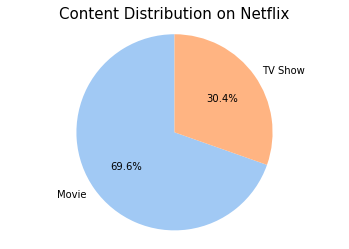

Movies are the most released content on Netflix


In [14]:
categories = netflix_data.type.value_counts().index
values = netflix_data.type.value_counts()

pastel_palette = sns.color_palette('pastel', 2)
plt.pie(values, labels=categories, autopct='%.1f%%', startangle=90 , colors=pastel_palette)

plt.axis('equal')
plt.title('Content Distribution on Netflix', fontsize=15)
plt.show()

print('Movies are the most released content on Netflix')

### Distribution of Content Rating

In [15]:
rating_order = netflix_data.rating.value_counts().index
rating = pd.Categorical(netflix_data.rating,rating_order) 
rating

['PG-13', 'TV-MA', 'TV-MA', 'TV-MA', 'TV-MA', ..., 'R', 'TV-Y7', 'R', 'PG', 'TV-14']
Length: 8807
Categories (17, object): ['TV-MA', 'TV-14', 'TV-PG', 'R', ..., 'UR', '74 min', '84 min', '66 min']

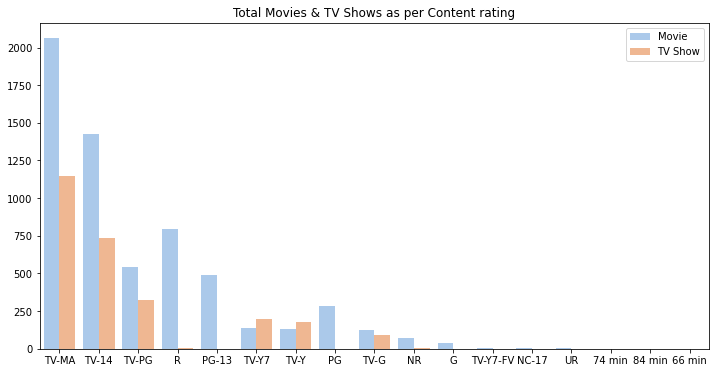

In [16]:
plt.figure(figsize=(12,6))

sns.countplot(x=rating,hue=netflix_data.type,palette='pastel')

plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc='upper right')
plt.title("Total Movies & TV Shows as per Content rating")
plt.show()

Top 3 rating with highest content released : 'TV-MA', 'TV-14', 'TV-PG'
    
* A Movie or show is classified in to multiple genres , lets do some manipulation to find the individual genre.

#### What are the top 10 genres with the most content?

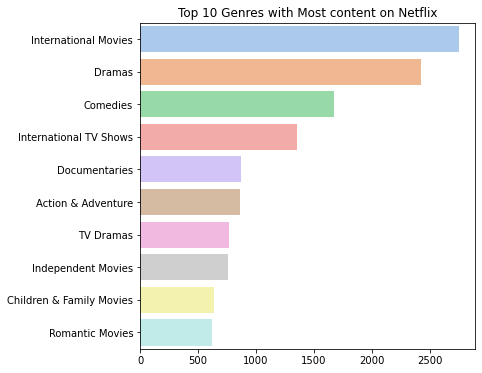

In [17]:
Genre = Top_N(netflix_data,'listed_in',10)

plt.figure(figsize=(6, 6))

barplot_netflix(Genre,Genre.index,'Top 10 Genres with Most content on Netflix')

plt.show()

* International movies have the highest number of releases followed by dramas and comedies.

#### Cleaning date column to extract year and month

In [21]:
## coverting date column to time stamp 

netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
 
netflix_data['month'] = netflix_data['date_added'].dt.month
netflix_data['year'] = netflix_data['date_added'].dt.year

In [20]:
## imputing the null values with zero

netflix_data['year'] = netflix_data.year.fillna(0).astype('int') 

In [23]:
## Filters for TV Shows and Movies

filter_TVShow = netflix_data['type']=='TV Show'
filter_Movie = netflix_data['type']=='Movie'

#### Which year has the most content released ?

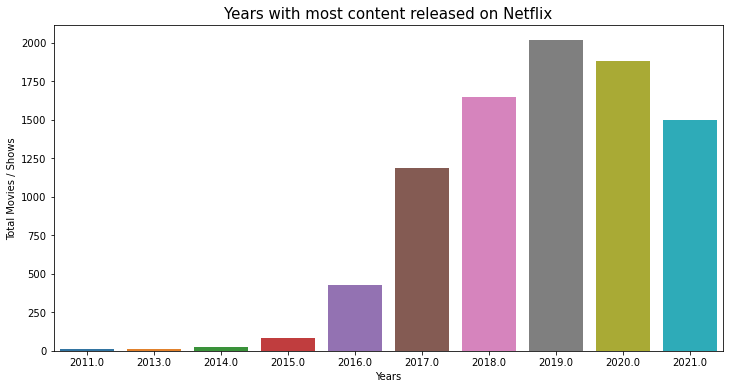

In [24]:
top_10_years = netflix_data['year'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years)

plt.xlabel('Years')
plt.ylabel('Total Movies / Shows')
plt.title('Years with most content released on Netflix',fontsize=15)

plt.show()

* In 2019, the content release on Netflix reached its peak, while in 2020 and 2021, the release declined significantly, possibly due to the impact of 
COVID-19.

In [25]:
## Content release over the years

content_by_year_TVShow = netflix_data[filter_TVShow]['release_year'].value_counts().sort_index()
content_by_year_Movies = netflix_data[filter_Movie]['release_year'].value_counts().sort_index()

## Content Added in netflix over the years

content_by_releasedYear = netflix_data[filter_TVShow]['date_added'].value_counts().sort_index()
content_by_releasedYear_Movies = netflix_data[filter_Movie]['date_added'].value_counts().sort_index()

#### How is the content release and added to netflix over the years?

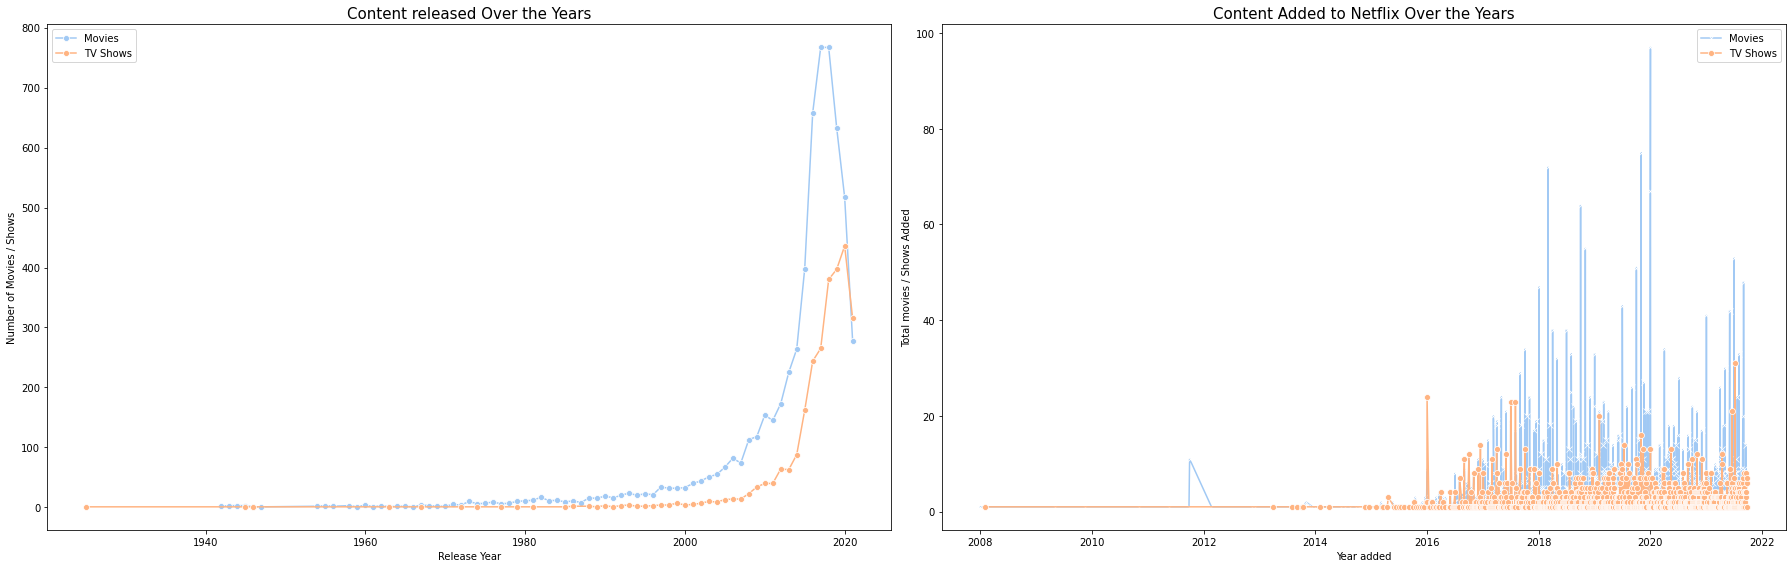

In [27]:
plt.figure(figsize=(25, 8))
pastel_palette = sns.color_palette('pastel')

plt.subplot(1,2,1)

sns.lineplot(x=content_by_year_Movies.index, y=content_by_year_Movies.values, marker='o', color=pastel_palette[0],label ='Movies')
sns.lineplot(x=content_by_year_TVShow.index, y=content_by_year_TVShow.values, marker='o', color=pastel_palette[1],label = 'TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies / Shows')
plt.title('Content released Over the Years',fontsize=15)

plt.subplot(1,2,2)

sns.lineplot(x=content_by_releasedYear_Movies.index, y=content_by_releasedYear_Movies.values, marker='x', color=pastel_palette[0],label ='Movies')
sns.lineplot(x=content_by_releasedYear.index, y=content_by_releasedYear.values, marker='o', color=pastel_palette[1],label = 'TV Shows')
plt.xlabel('Year added')
plt.ylabel('Total movies / Shows Added')
plt.title('Content Added to Netflix Over the Years',fontsize=15)

plt.tight_layout()
plt.show()

* Over the years, movies have consistently outnumbered TV show releases on Netflix. However, after 2020, there has been a significant decrease in both movie, TV Shows releases into the platform, clearly reflecting the impact of COVID-19.

### Let's explore which months of the year have the highest amount of content added.

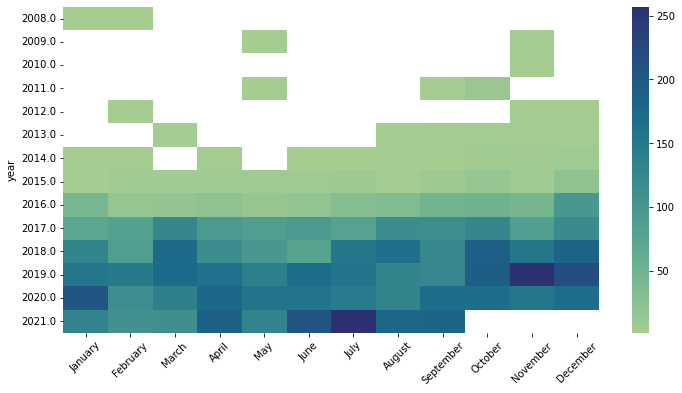

In [29]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
releasedata = netflix_data.groupby('year')['month'].value_counts().unstack()

releaseDensity = pd.DataFrame(releasedata)
releaseDensity.columns = months
plt.figure(figsize=(12, 6))
ax = sns.heatmap(releaseDensity,cmap="crest")

# Rotate x-axis, y-axis tick labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

* July 2021 , November 2019 particularly stands out as the month with the highest volume of content added to Netflix.

#### Distribution of TV shows duration

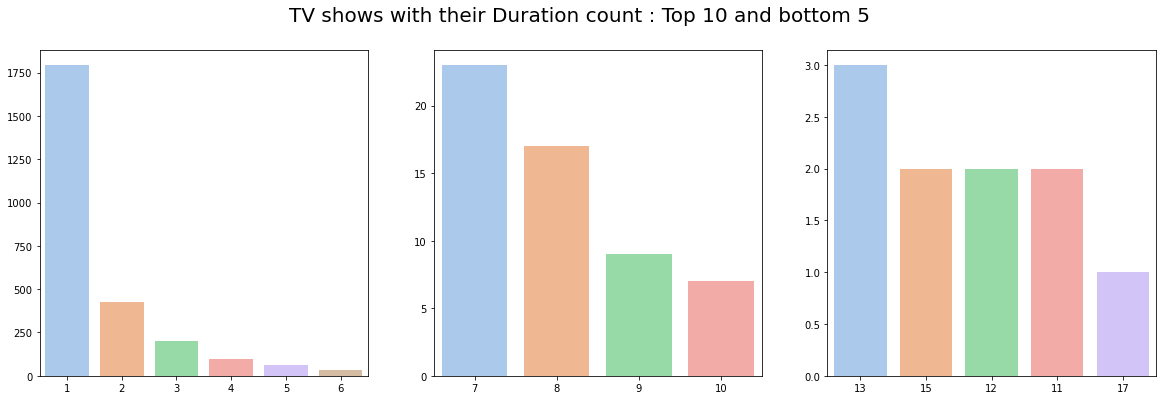

In [30]:
TV_Show_duration = netflix_data[filter_TVShow].duration.dropna().apply(lambda x : str(x).split()[0]).value_counts()

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.barplot(x=TV_Show_duration[:6].index,y =TV_Show_duration[:6] ,palette='pastel')
plt.ylabel(None)

plt.subplot(1,3,2)
sns.barplot(x=TV_Show_duration[6:10].index,y =TV_Show_duration[6:10] ,palette='pastel')
plt.ylabel(None)

plt.subplot(1,3,3)
sns.barplot(x=TV_Show_duration.tail(5).index,y =TV_Show_duration.tail(5) ,palette='pastel')
plt.ylabel(None)

plt.suptitle('TV shows with their Duration count : Top 10 and bottom 5',fontsize=20)

plt.show()

* It appears that there are errors in the duration values, which could be renamed as "unknown". However, these discrepancies are not likely to have a significant impact on the overall results.

#### Let's identify the TV show that has a total of 17 seasons

In [31]:
t = netflix_data.duration.dropna()
substring_to_find = '17 Seasons'
matching_index = t[t.str.contains(substring_to_find)].index
matching_index

print('TV show with most no.of seasons : "',netflix_data.iloc[matching_index[0]]['title'],'"', f"{substring_to_find}")

TV show with most no.of seasons : " Grey's Anatomy " 17 Seasons


* There are over 1600 TV shows on Netflix that have at least one season. Additionally, there are more than 900 shows with two seasons or more. Interestingly, there is only one show on Netflix that has a remarkable 17 seasons which is "Grey's Anatomy".

#### Lets explore Movies duration

In [32]:
movie_duration = netflix_data[filter_Movie].duration.dropna().apply(lambda x : str(x).split()[0]).value_counts()

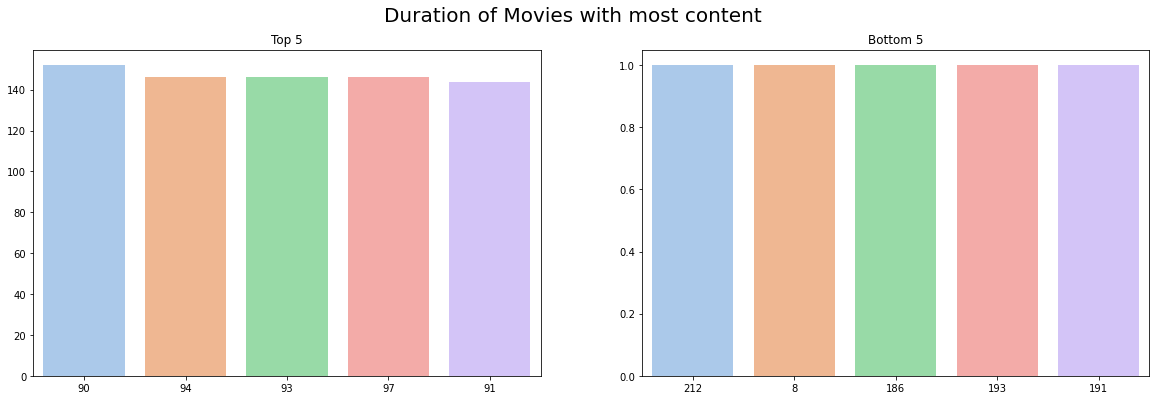

In [33]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

barplot_netflix(movie_duration[:5].index,movie_duration[:5],'Top 5')

plt.subplot(1,2,2)
barplot_netflix(movie_duration.tail(5).index,movie_duration.tail(5),'Bottom 5')

plt.suptitle('Duration of Movies with most content',fontsize=20)
plt.show()

#### Movies with more than 120 mins duration

In [35]:
m = netflix_data[filter_Movie].duration.dropna()
long_duration = m[m.str.contains('min')].apply(lambda x: x.split()[0]).astype('int')

In [36]:
print("Median of movie duration : ",long_duration.median())
print("Total movies with more than 2 hours length : ",len(long_duration[long_duration>120]))

Median of movie duration :  98.0
Total movies with more than 2 hours length :  1142


In [37]:
## filtering the index for movie title

filter_movie_index = long_duration[long_duration>120].sort_values(ascending=False).nlargest(10).index

In [38]:
netflix_data.loc[filter_movie_index][['title','duration','year']]

,title,duration,year
4253,Black Mirror: Bandersnatch,312 min,2018.0
717,Headspace: Unwind Your Mind,273 min,2021.0
2491,The School of Mischief,253 min,2020.0
2487,No Longer kids,237 min,2020.0
2484,Lock Your Girls In,233 min,2020.0
2488,Raya and Sakina,230 min,2020.0
166,Once Upon a Time in America,229 min,2021.0
7932,Sangam,228 min,2019.0
1019,Lagaan,224 min,2021.0
4573,Jodhaa Akbar,214 min,2018.0


* The majority of movies available on Netflix have a duration of 99 minutes or more.

#### Which countries have the most releases ?

In [41]:
Top_country = Top_N(netflix_data,'country',10)
Top_country

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

#### Visualization data in both pie chart and bar chart

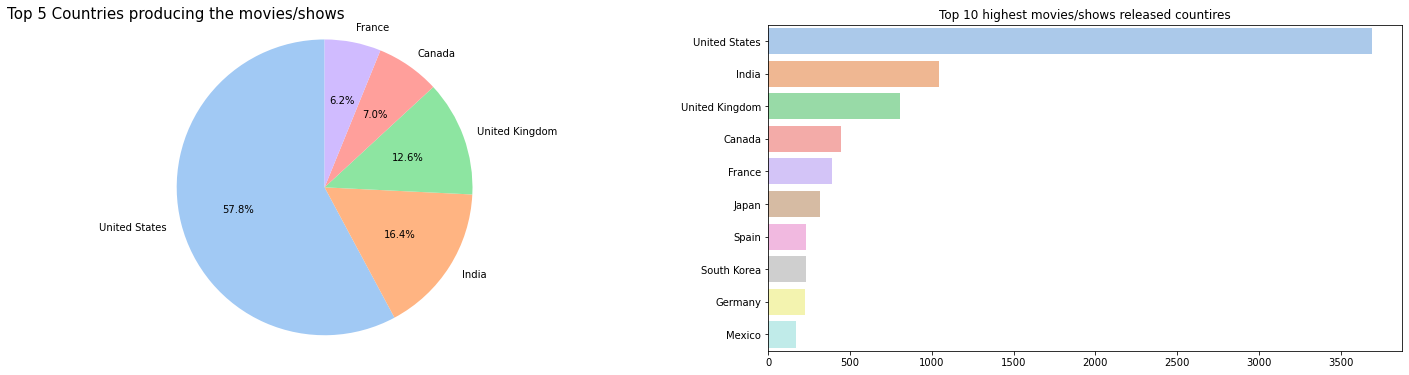

In [42]:
categories = Top_country.index
values = Top_country
pastel_palette = sns.color_palette('pastel', 5)

plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
plt.pie(values[:5], labels=categories[:5], autopct='%1.1f%%', startangle=90 , 
        colors=pastel_palette)

plt.axis('equal')
plt.title('Top 5 Countries producing the movies/shows', fontsize=15,loc='left')

plt.subplot(1,2,2)
barplot_netflix(values[:10],categories[:10],'Top 10 highest movies/shows released countires')

plt.show()

* The United States holds the majority share in content releases on Netflix, followed by India, the United Kingdom, Canada, and France.

#### Who are the top 10 directors and actors with the most content available on Netflix?

In [43]:
top_10_directors = Top_N(netflix_data,'director',10)
top_10_cast = Top_N(netflix_data,'cast',10)

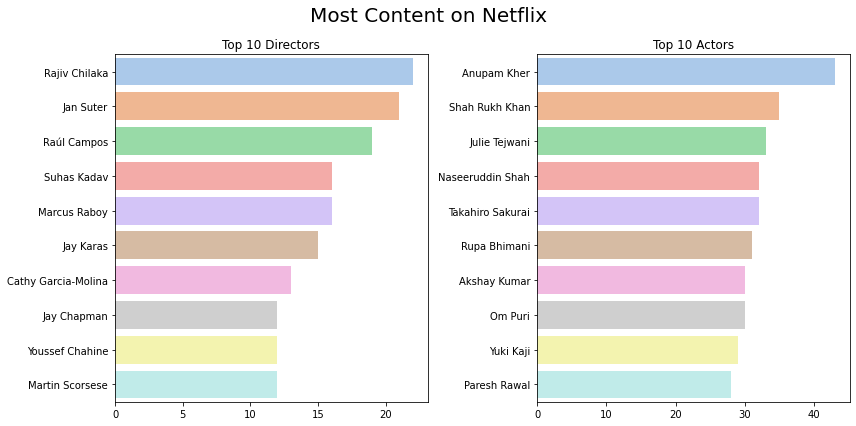

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
barplot_netflix(top_10_directors,top_10_directors.index,'Top 10 Directors')

plt.subplot(1,2,2)
barplot_netflix(top_10_cast,top_10_cast.index,'Top 10 Actors')

plt.suptitle("Most Content on Netflix",fontsize=20)
plt.tight_layout()
plt.show()


In [45]:
## Filtering data for United States , India, United Kingdom, and Canada 

USA = netflix_data[netflix_data.country == 'United States']
India = netflix_data[netflix_data.country == 'India']
UK = netflix_data[netflix_data.country == 'United Kingdom']
Canada = netflix_data[netflix_data.country == 'Canada']

In [46]:
## Filtering data for United States , India, United Kingdom, and Canada 

USA = netflix_data[netflix_data.country == 'United States']
India = netflix_data[netflix_data.country == 'India']
UK = netflix_data[netflix_data.country == 'United Kingdom']
Canada = netflix_data[netflix_data.country == 'Canada']

# For Directors

USA_director = Top_N(USA,'director',10)
India_director = Top_N(India,'director',10)
UK_director = Top_N(UK,'director',10)
Canada_director = Top_N(Canada,'director',10)

# for Cast

USA_cast = Top_N(USA,'cast',10)
India_cast = Top_N(India,'cast',10)
UK_cast = Top_N(UK,'cast',10)
Canada_cast = Top_N(Canada,'cast',10)

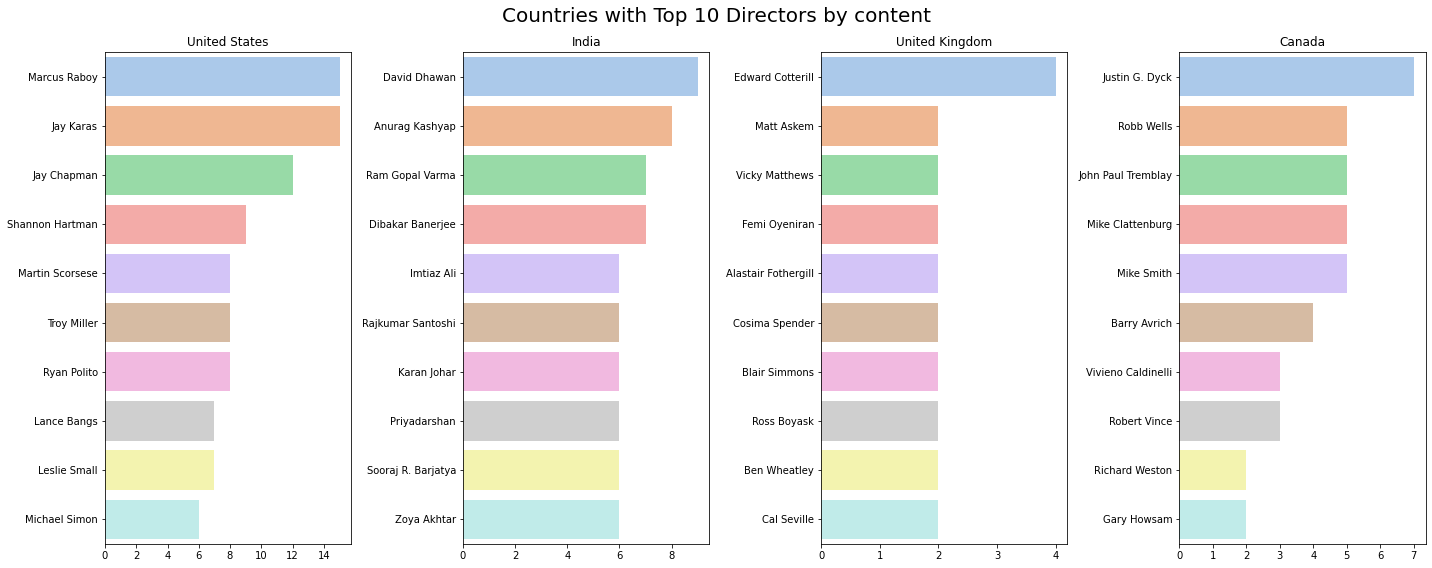

In [47]:
plt.figure(figsize=(20, 8))

plt.subplot(1,4,1)
barplot_netflix(USA_director,USA_director.index,'United States')

plt.subplot(1,4,2)
barplot_netflix(India_director,India_director.index,'India')

plt.subplot(1,4,3)
barplot_netflix(UK_director,UK_director.index,'United Kingdom')

plt.subplot(1,4,4)
barplot_netflix(Canada_director,Canada_director.index,'Canada')

plt.suptitle("Countries with Top 10 Directors by content",fontsize=20)
plt.tight_layout()
plt.show()

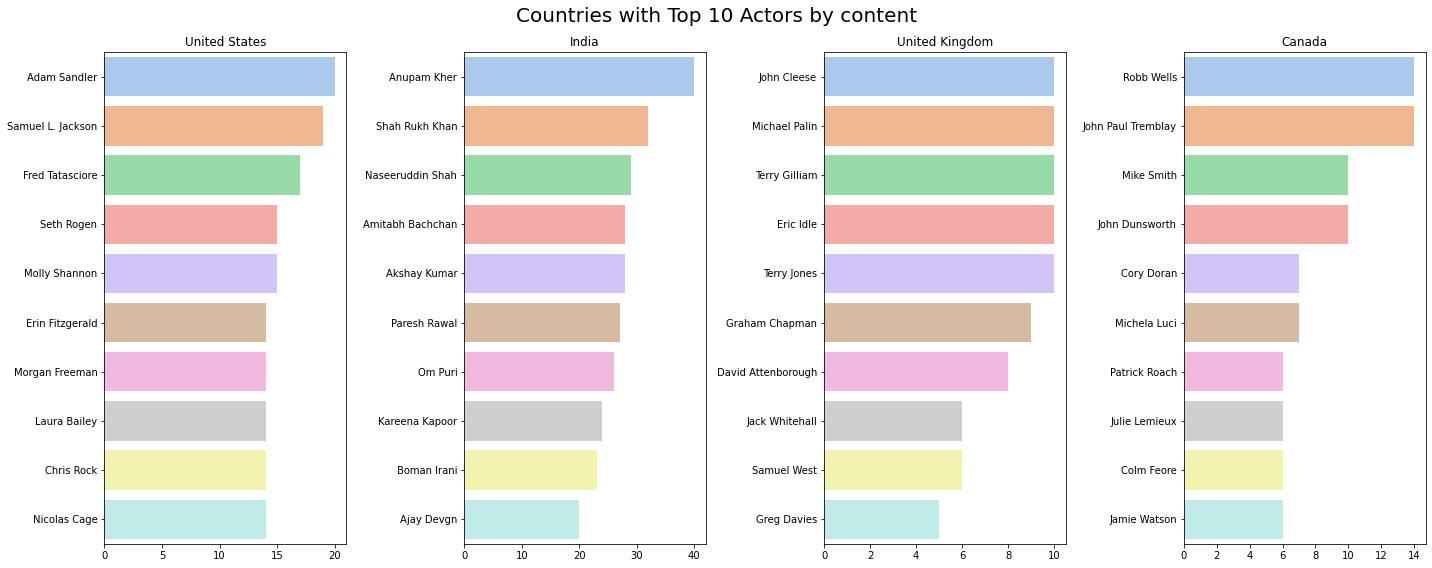

In [48]:
plt.figure(figsize=(20, 8))

plt.subplot(1,4,1)
barplot_netflix(USA_cast,USA_cast.index,'United States')

plt.subplot(1,4,2)
barplot_netflix(India_cast,India_cast.index,'India')

plt.subplot(1,4,3)
barplot_netflix(UK_cast,UK_cast.index,'United Kingdom')

plt.subplot(1,4,4)
barplot_netflix(Canada_cast,Canada_cast.index,'Canada')

plt.suptitle("Countries with Top 10 Actors by content",fontsize=20)
plt.tight_layout()
plt.show()

## Summary

In a recent analysis of Netflix's vast content library, we delved into 8807 records spanning 12 diverse columns. Our findings revealed an intriguing picture of the streaming giant's offerings, painting a clear portrait of viewer preferences and global dynamics.

1. Movies Dominate the Streaming Realm: A staggering 69.6% of Netflix's content consists of movies. These cinematic masterpieces take center stage, captivating audiences worldwide with their diverse genres and captivating storytelling.

2. Ratings that Resonate: The top three most popular ratings on Netflix are 'TV-MA', 'TV-14', and 'TV-PG'. These ratings cater to a broad audience, from mature themes to family-friendly content, satisfying various viewer preferences.

3. Global Impact: International movies emerged as the frontrunners, surpassing all other genres in terms of the number of releases on Netflix. Audiences across borders relish these diverse cinematic experiences, followed closely by dramas and comedies.

4. A Tale of Two Years: The year 2019 marked a pinnacle moment for Netflix's content release, soaring to its highest peak. However, 2020 and 2021 witnessed a discernible downturn, potentially influenced by the unprecedented impact of COVID-19 on the entertainment industry.

5. The Decline of TV Shows: Traditionally, movies outnumbered TV show releases on Netflix. However, the post-2020 era saw an unexpected decline in both movie and TV show releases, underscoring the far-reaching effects of the pandemic on content creation.

6. A Month to Remember: Among all the months, July 2021 and November 2019 stood out as exceptional periods, witnessing the highest volume of content additions to Netflix. These vibrant months enthralled viewers with a plethora of new content choices.

7. TV Show Extravaganza: Netflix boasts a rich collection of TV shows, with over 1600 having at least one season. Even more fascinating, over 900 TV shows feature two seasons or more, capturing audiences' dedication to these captivating series. One exceptional show, "Grey's Anatomy," stands above all, proudly holding an astounding 17 seasons.

8. Cinematic Escapades: The majority of Netflix movies delight viewers with a runtime of 99 minutes or more. With diverse options at their fingertips, audiences can indulge in extended storytelling and immersive experiences.

9. United States Dominance: Among the countries contributing to Netflix's content, the United States claims the lion's share, followed closely by India, the United Kingdom, Canada, and France. These influential regions continue to drive Netflix's ever-evolving content landscape.

In conclusion, our analysis reveals a captivating story of Netflix's content trends, showcasing a deep appreciation for movies worldwide. While the impact of COVID-19 posed challenges to content releases, the streaming giant's diverse offerings continue to captivate global audiences. As Netflix continues to shape the entertainment landscape, audiences can eagerly anticipate more compelling stories and experiences in the days to come.